In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
holes = np.linspace(1,24, 24)
fan25 = np.array(
    [0.5, 0.6, 0.7, 1.0, 1.2, 1.25, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.3, 1.2 ,1.0, 0.75, 0.6]
    )*0.0254
fan45 = np.array(
    [0.4, 0.6, 1.2, 2.0, 2.7, 2.8, 2.65, 2.7, 2.7, 2.75, 2.8, 2.8, 2.8, 2.8, 2.8, 2.75, 2.7, 2.7, 2.65, 2.8, 2.7, 2.0, 1.2, 0.6]
    )*0.0254
angles = np.linspace(-165, 180, 24)*np.pi/180

gagep25 = -1000*9.81*fan25
gagep45 = -1000*9.81*fan45

gagepinf25 = -1.225*(3.4**2)/2
gagepinf45 = -1.225*(15.3**2)/2

Cp25 = 2*(gagep25-gagepinf25)/(1.225*(3.4**2))

Cp45 = 2*(gagep45-gagepinf45)/(1.225*15.3**2)

In [73]:
for _ in fan45:
    print(round(_/0.0254,2))

0.4
0.6
1.2
2.0
2.7
2.8
2.65
2.7
2.7
2.75
2.8
2.8
2.8
2.8
2.8
2.75
2.7
2.7
2.65
2.8
2.7
2.0
1.2
0.6


In [55]:
from scipy.optimize import curve_fit

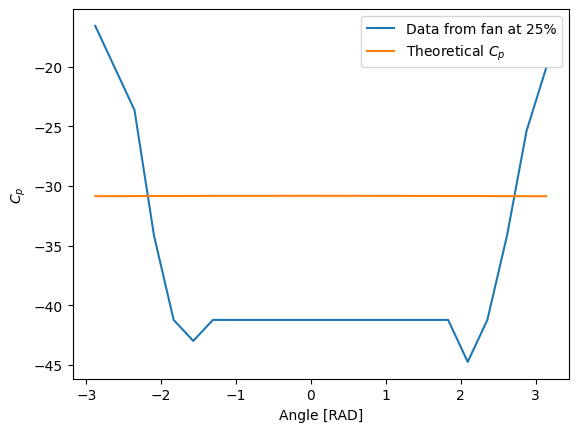

In [56]:
def Cp(angle, A, C):
    return A*(1-4*np.sin(angle)**2)+C

par25, cov25 = curve_fit(Cp, angles, Cp25)

X25 = np.linspace(-165, 180, 1000)*np.pi/180
Y25 = Cp(X25*np.pi/180, *par25)

plt.plot(angles, Cp25, label='Data from fan at 25%')
plt.plot(X25, Y25, label='Theoretical $C_p$')
plt.xlabel('Angle [RAD]')
plt.ylabel('$C_p$')
plt.legend();

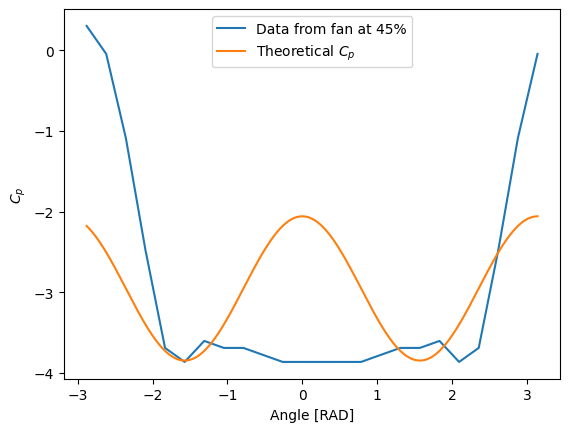

In [57]:
par45, cov45 = curve_fit(Cp, angles, Cp45)

X45 = np.linspace(-165, 180, 1000)*np.pi/180
Y45 = Cp(X45, *par45)

plt.plot(angles, Cp45, label='Data from fan at 45%')
plt.plot(X45, Y45, label='Theoretical $C_p$')
plt.xlabel('Angle [RAD]')
plt.ylabel('$C_p$')
plt.legend();

In [58]:
import scipy.integrate as integrate


In [62]:
angles = abs(angles)
dFit25 = integrate.quad(lambda x: Cp(x, *par25)*np.cos(x), 0, np.pi)[0]
dFit45 = integrate.quad(lambda x: Cp(x, *par45)*np.cos(x), 0, np.pi)[0]

dInterp25 = integrate.quad(lambda x: np.interp(x, angles, Cp25)*np.cos(x), 0, np.pi)[0]
dInterp45 = integrate.quad(lambda x: np.interp(x, angles, Cp45)*np.cos(x), 0, np.pi)[0]

dTrap25 = np.pi/2*(Cp25[np.where(angles==0)[0][0]]*np.cos(0)+Cp25[np.where(angles==np.pi)[0][0]]*np.cos(np.pi))
dTrap45 = np.pi/2*(Cp45[np.where(angles==0)[0][0]]*np.cos(0)+Cp25[np.where(angles==np.pi)[0][0]]*np.cos(np.pi))

print(dFit25, dInterp25, dTrap25, '\n', dFit45, dInterp45, dTrap45)

-1.3283001216971546e-15 1.590015447555334 -33.16728512953533 
 -2.1313488606329598e-16 0.22411908314898626 25.52379555235847


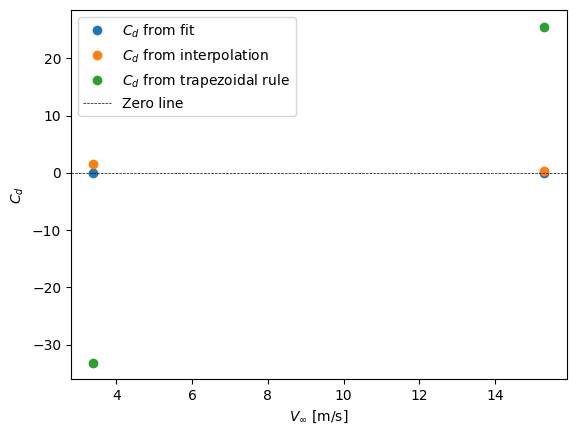

In [76]:
VInf = [3.4, 15.3]
plt.plot(VInf, [dFit25, dFit45], 'o', label='$C_d$ from fit')
plt.plot(VInf, [dInterp25, dInterp45], 'o', label='$C_d$ from interpolation')
plt.plot(VInf, [dTrap25, dTrap45], 'o', label='$C_d$ from trapezoidal rule')

#X-axis:
plt.axhline(0, color='black', lw=0.5, ls = '--', label='Zero line')

plt.legend()
plt.xlabel('$V_\infty$ [m/s]')
plt.ylabel('$C_d$');